In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import matplotlib.pyplot as plt
import data_tools
import bmi_lstm
from pathlib import Path
from netCDF4 import Dataset

In [2]:
model = bmi_lstm.bmi_LSTM()
model.initialize(bmi_cfg_file=Path('lstm_bmi_config.yml'))

thank you for choosing LSTM


In [3]:
with open(Path(model.cfg_train['run_dir'] / 'test/model_epoch001' / 'test_results.p'), 'rb') as fb:
    test_results = pickle.load(fb)

In [4]:
test_results.keys()

dict_keys(['01022500', '01547700', '02064000', '03015500'])

In [5]:
test_results['01022500']['1H']['xr'].qobs_mm_per_hour_sim  

<xarray.DataArray 'qobs_mm_per_hour_sim' (date: 17520, time_step: 1)>
array([[0.10129121],
       [0.10106912],
       [0.10088927],
       ...,
       [0.10038564],
       [0.10003402],
       [0.09973694]])
Coordinates:
  * date       (date) datetime64[ns] 2001-01-01 ... 2002-12-31T23:00:00
  * time_step  (time_step) int64 0

In [6]:
input_data = Dataset('/glade/work/jframe/neuralhydrology/'+ \
                     'test/test_data/camels_us/hourly/usgs-streamflow-nldas_hourly.nc', 'r')


In [7]:
input_data['date']

<class 'netCDF4._netCDF4.Variable'>
int64 date(date)
    units: hours since 2000-01-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (26304,)
filling on, default _FillValue of -9223372036854775806 used

In [8]:
len(list(input_data['temperature'][0].data))

26304

In [ ]:
runoff_output_list = []

for temp, precip in zip(list(input_data['total_precipitation'][0].data),
                        list(input_data['temperature'][0].data)):
    model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',precip)
    model.set_value('land_surface_air__temperature',temp)

    model.update()

    runoff_output_list.append(model.streamflow)

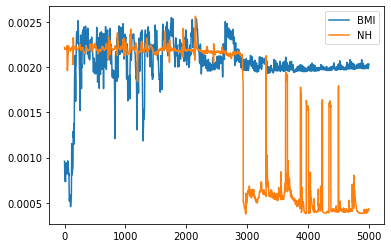

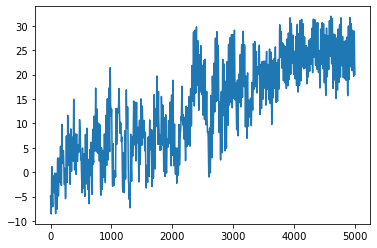

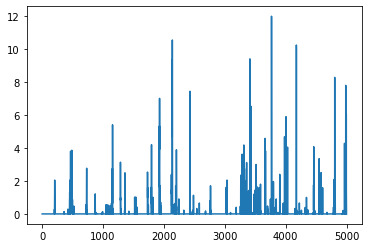

In [17]:
start_plot = 365*24
n_plot = 5000
plt.plot(runoff_output_list[start_plot:start_plot+n_plot], label='BMI')
plt.plot(test_results['01022500']['1H']['xr'].qobs_mm_per_hour_sim[:n_plot] * model.output_factor, label='NH')
plt.legend()
plt.show()
plt.close()
plt.plot(list(input_data['temperature'][0].data[start_plot:start_plot+n_plot]))
plt.show()
plt.close()
plt.plot(list(input_data['total_precipitation'][0].data[start_plot:start_plot+n_plot]))

thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM


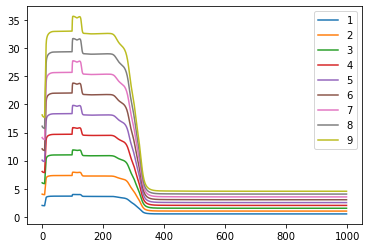

In [11]:
# Some silly test of the basin area...

for area_sqkm in list(range(1,10)):
    
    model = bmi_lstm.bmi_LSTM()
    model.initialize(bmi_cfg_file=Path('lstm_bmi_config.yml'))
    
    # This is fake, this is really taked care of in initiallize
    model.output_factor =  area_sqkm * 35.315 # from m3/s to ft3/s
    
    runoff_output_list = []
    model.set_value('land_surface_air__temperature',25)
    for i in range(1,1000):

        if i in list(range(10,100)):
            model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',5)
        else:
            model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',0)

        model.update()

        runoff_output_list.append(model.streamflow)
        
    plt.plot(runoff_output_list, label=area_sqkm)
    plt.legend()
plt.show()
plt.close()

# Old stuff Below...

In [2]:
model = lstm.bmi_LSTM()
model.read_cfg_file('lstm-info.cfg')

In [3]:
model.initialize()

In [4]:
model.input_tensor.shape

torch.Size([2492, 11])

In [5]:
model.update()

updating for t:  1772
start_this_seq 1771
for time: 1773 lstm output: 318.3106812997393


In [6]:
model.input_tensor.shape

torch.Size([2492, 11])

In [7]:
model.update_until(model.iend)

updating for t:  1773
start_this_seq 1772
for time: 1774 lstm output: 414.1469895884302
updating for t:  1774
start_this_seq 1773
for time: 1775 lstm output: 437.5869660793467
updating for t:  1775
start_this_seq 1774
for time: 1776 lstm output: 420.3751379097398
updating for t:  1776
start_this_seq 1775
for time: 1777 lstm output: 396.0380111669877
updating for t:  1777
start_this_seq 1776
for time: 1778 lstm output: 373.2338444831689
updating for t:  1778
start_this_seq 1777
for time: 1779 lstm output: 347.33814414177755
updating for t:  1779
start_this_seq 1778
for time: 1780 lstm output: 317.75638783255533
updating for t:  1780
start_this_seq 1779
for time: 1781 lstm output: 287.90632160797486
updating for t:  1781
start_this_seq 1780
for time: 1782 lstm output: 261.70205310110197
updating for t:  1782
start_this_seq 1781
for time: 1783 lstm output: 239.5991122049502
updating for t:  1783
start_this_seq 1782
for time: 1784 lstm output: 218.86670153240942
updating for t:  1784
start

for time: 2049 lstm output: 11.770238449431362
updating for t:  2049
start_this_seq 2048
for time: 2050 lstm output: 11.804769676755932
updating for t:  2050
start_this_seq 2049
for time: 2051 lstm output: 11.67403880234837
updating for t:  2051
start_this_seq 2050
for time: 2052 lstm output: 11.506931408289548
updating for t:  2052
start_this_seq 2051
for time: 2053 lstm output: 11.16884224146208
updating for t:  2053
start_this_seq 2052
for time: 2054 lstm output: 10.868252575970741
updating for t:  2054
start_this_seq 2053
for time: 2055 lstm output: 11.086384875979356
updating for t:  2055
start_this_seq 2054
for time: 2056 lstm output: 11.234721383053621
updating for t:  2056
start_this_seq 2055
for time: 2057 lstm output: 11.026416551243031
updating for t:  2057
start_this_seq 2056
for time: 2058 lstm output: 10.927395665393634
updating for t:  2058
start_this_seq 2057
for time: 2059 lstm output: 11.069170724652874
updating for t:  2059
start_this_seq 2058
for time: 2060 lstm out

updating for t:  2339
start_this_seq 2338
for time: 2340 lstm output: 516.3899175789994
updating for t:  2340
start_this_seq 2339
for time: 2341 lstm output: 484.58663515778466
updating for t:  2341
start_this_seq 2340
for time: 2342 lstm output: 453.326383303975
updating for t:  2342
start_this_seq 2341
for time: 2343 lstm output: 421.6077049628222
updating for t:  2343
start_this_seq 2342
for time: 2344 lstm output: 388.774323021103
updating for t:  2344
start_this_seq 2343
for time: 2345 lstm output: 354.9718317785695
updating for t:  2345
start_this_seq 2344
for time: 2346 lstm output: 325.10241571572664
updating for t:  2346
start_this_seq 2345
for time: 2347 lstm output: 302.76552704100936
updating for t:  2347
start_this_seq 2346
for time: 2348 lstm output: 291.3038650177633
updating for t:  2348
start_this_seq 2347
for time: 2349 lstm output: 235.73808429538528
updating for t:  2349
start_this_seq 2348
for time: 2350 lstm output: 224.54590846945865
updating for t:  2350
start_t

In [8]:
print(np.array(model.obs).shape)
print(len(model.output_list))

(720,)
720


Text(0, 0.5, 'precipitation (kg/m2)')

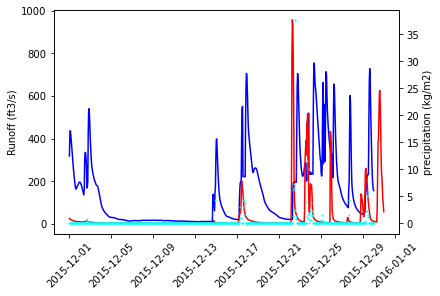

In [9]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = pd.date_range(model.test_date_start, model.test_date_end, freq="H")
ax.plot(xdata, model.output_list[:xdata.shape[0]], label='lstm output', c='b')
ax.plot(model.obs, label='observation', c='r')
ax.set_ylabel('Runoff (ft3/s)')
plt.xticks(rotation = 45)
ax2=ax.twinx()
ax2.scatter(xdata,model.forcings['RAINRATE'].values[-721:-24], s=1, c='cyan', label='precip')
ax2.set_ylabel('precipitation (kg/m2)')

In [10]:
model.calc_metrics()

Nash-Suttcliffe Efficiency -3.413474587833041
on 720 samples


In [10]:
model.get_time_step()

'1 hour'

In [11]:
model.get_attribute('model_name')

'LSTM for Next Generation NWM'

In [12]:
model.get_input_var_names()

['land_surface_radiation~incoming~longwave__energy_flux',
 'land_surface_air__pressure',
 'atmosphere_air_water~vapor__relative_saturation',
 'atmosphere_water__liquid_equivalent_precipitation_rate',
 'land_surface_radiation~incoming~shortwave__energy_flux',
 'land_surface_air__temperature',
 'land_surface_wind__x_component_of_velocity',
 'land_surface_wind__y_component_of_velocity']

In [13]:
model.get_output_var_names()

['land_surface_water__runoff_volume_flux']

In [14]:
model.get_var_name('atmosphere_water__liquid_equivalent_precipitation_rate')

'RAINRATE'

In [15]:
model.get_var_units('atmosphere_water__liquid_equivalent_precipitation_rate')

'kg m-2'

In [16]:
model.get_var_type("land_surface_water__runoff_volume_flux")

"<class 'float'>"

In [17]:
model.get_var_units("land_surface_water__runoff_volume_flux")

'mm'

In [18]:
model.get_var_rank("land_surface_water__runoff_volume_flux")

0

In [19]:
model.run_unit_tests()

Unit test passed: get_output_var_names
Unit test passed: get_var_name
Unit test passed: get_var_units
Unit test passed: get_var_rank
